In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv ('expresso_processednew.csv')
data

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64371,34995,K > 24 month,2300.0,10.0,2224.0,741.0,25.0,1441.0,3.0,NO,62,0
64372,34996,K > 24 month,10800.0,27.0,10801.0,3600.0,26.0,11460.0,25.0,NO,45,0
64373,34997,K > 24 month,4000.0,4.0,4007.0,1336.0,5.0,11873.0,3.0,NO,50,0
64374,34998,K > 24 month,13600.0,28.0,14600.0,4867.0,37.0,3676.0,291.0,NO,62,0


In [3]:
#
data.describe()


,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
count,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.00000,64376.000000,64376.000000
mean,16216.330620,5061.212812,10.630126,5173.670560,1724.561591,13.252718,3252.074189,218.65919,33.197496,0.456319
std,9501.522628,6777.622016,12.490926,6913.023944,2304.338459,13.988994,7841.567790,754.75000,20.432429,0.498092
min,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,8046.750000,1000.000000,2.000000,1001.000000,334.000000,3.000000,1.000000,3.00000,14.000000,0.000000
50%,16093.500000,2900.000000,6.000000,2951.000000,984.000000,8.000000,507.000000,15.00000,32.000000,0.000000
75%,24140.250000,6500.000000,14.000000,6699.000000,2233.000000,18.000000,3156.000000,97.00000,54.000000,1.000000
max,34999.000000,286500.000000,133.000000,323541.000000,107847.000000,91.000000,283493.000000,25263.00000,62.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      64376 non-null  int64  
 1   TENURE          64376 non-null  object 
 2   MONTANT         64376 non-null  float64
 3   FREQUENCE_RECH  64376 non-null  float64
 4   REVENUE         64376 non-null  float64
 5   ARPU_SEGMENT    64376 non-null  float64
 6   FREQUENCE       64376 non-null  float64
 7   DATA_VOLUME     64376 non-null  float64
 8   ON_NET          64376 non-null  float64
 9   MRG             64376 non-null  object 
 10  REGULARITY      64376 non-null  int64  
 11  CHURN           64376 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 5.9+ MB


In [5]:
#Check the for null values
data.isnull().sum()

Unnamed: 0        0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
MRG               0
REGULARITY        0
CHURN             0
dtype: int64

In [6]:
#Seperate the columns to categorical and numerical columns
cat =data.select_dtypes(exclude = 'number')
num = data.select_dtypes(include= 'number')
print(f'Categorical Variables')
display(cat.head())
print(f'\n\n Numerical Variables')
display(num.head())

Categorical Variables


,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO




 Numerical Variables


,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


In [7]:
# convert all text columns to numbers
# scale the data so they have lesser range of values

from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

# copy your data
new_data = data.copy()



# Encode the categorical data set
for i in cat:
    if i in new_data.columns:
        new_data[i] = encoder.fit_transform(new_data[i])

new_data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,7,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,0,32,1
1,1,7,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,0,29,1
2,2,7,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,0,49,1
3,3,5,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,0,1,1
4,4,7,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,0,21,1


In [8]:
new_data.drop(['Unnamed: 0', 'MRG'], axis = 1, inplace = True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x = new_data.drop('CHURN', axis = 1)
y = new_data.CHURN

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 4, stratify = y)

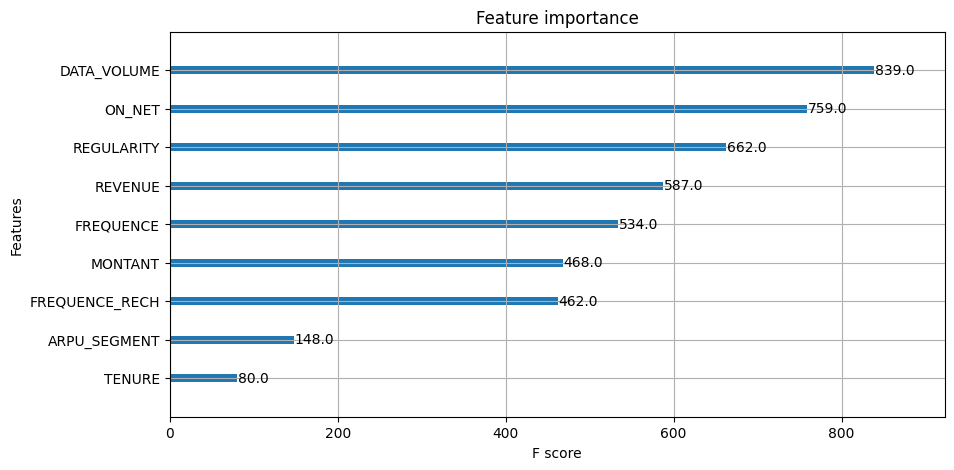

In [10]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = new_data.drop('CHURN', axis = 1)
y = new_data.CHURN

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [11]:
sel_columns= ['DATA_VOLUME', 'ON_NET', 'REGULARITY','REVENUE', 'FREQUENCE', 'MONTANT', 'FREQUENCE_RECH','ARPU_SEGMENT','TENURE','CHURN']
sel_data = new_data[sel_columns]

sel_data

,DATA_VOLUME,ON_NET,REGULARITY,REVENUE,FREQUENCE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,TENURE,CHURN
0,266.0,1.0,32,3002.0,8.0,3000.0,4.0,1001.0,7,1
1,4341.0,1.0,29,1980.0,5.0,1500.0,3.0,660.0,7,1
2,2700.0,4.0,49,9639.0,38.0,9850.0,32.0,3213.0,7,1
3,763.0,8.0,1,999.0,2.0,1000.0,2.0,333.0,5,1
4,2955.0,28.0,21,1180.0,3.0,1200.0,3.0,393.0,7,1
...,...,...,...,...,...,...,...,...,...,...
64371,1441.0,3.0,62,2224.0,25.0,2300.0,10.0,741.0,7,0
64372,11460.0,25.0,45,10801.0,26.0,10800.0,27.0,3600.0,7,0
64373,11873.0,3.0,50,4007.0,5.0,4000.0,4.0,1336.0,7,0
64374,3676.0,291.0,62,14600.0,37.0,13600.0,28.0,4867.0,7,0


<Axes: xlabel='CHURN', ylabel='count'>

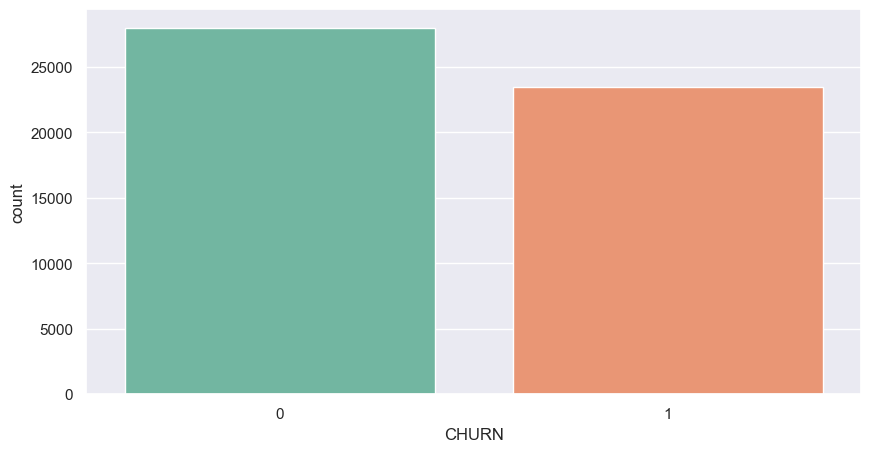

In [12]:
sns.set(style= 'darkgrid')
sns.countplot(x = ytrain, palette = 'Set2')

In [13]:
x = sel_data.drop('CHURN', axis = 1)
y = sel_data.CHURN

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = y)

In [14]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

cross_val = logreg.predict(xtrain)
print(classification_report(cross_val, ytrain))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78     27852
           1       0.75      0.74      0.74     23648

    accuracy                           0.77     51500
   macro avg       0.76      0.76      0.76     51500
weighted avg       0.77      0.77      0.77     51500



<Axes: >

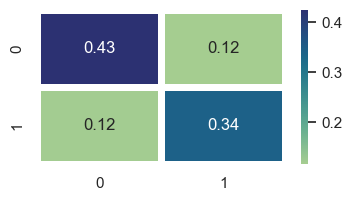

In [15]:
revealer = confusion_matrix(cross_val, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      7052
           1       0.74      0.75      0.75      5824

    accuracy                           0.77     12876
   macro avg       0.77      0.77      0.77     12876
weighted avg       0.77      0.77      0.77     12876



<Axes: >

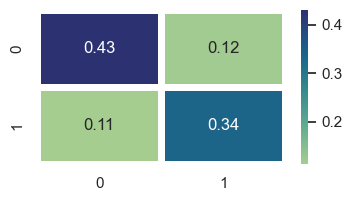

In [16]:
# Evaluating the test set
test_pred = logreg.predict(xtest)

print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [17]:
import joblib
joblib.dump(logreg, open('ExpressoChurn.pkl', 'wb'))